In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist


{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [5]:
dir(mnist)

['COL_NAMES', 'DESCR', 'data', 'target']

In [6]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

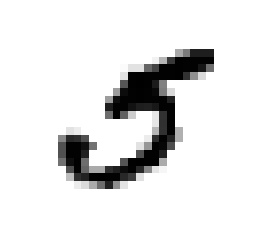

In [27]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [28]:
y[36000]

5.0

In [29]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Shuffle so as to remove the possibility of back to back instances of particular numbers

In [30]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [31]:
y_train_5 = (y_train == 5)  # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

In [32]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [33]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [36]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.96395,  0.96225,  0.9433 ])

In [37]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [38]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.9067 ,  0.91225,  0.91   ])

In [39]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53267,  1312],
       [ 1298,  4123]])

In [43]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.75860165593376261

In [44]:
recall_score(y_train_5, y_train_pred)

0.76056078214351597

In [46]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.75957995578481952

In [52]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([ 83932.74210038])

In [53]:
y_some_digit_pred = (y_scores>threshold)

In [54]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [55]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_5, y_scores)

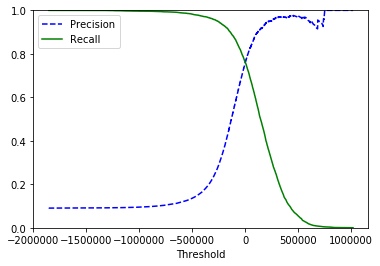

In [57]:
def plot_precision_recall_vs_thresholds(precisions,recalls,thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds,recalls[:-1],'g-',label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])

plot_precision_recall_vs_thresholds(precisions,recalls,thresholds)
plt.show()

In [59]:
y_train_pred_90 = (y_scores > 70000)
precision_score(y_train_5, y_train_pred_90)

0.85369422092172642

In [60]:
recall_score(y_train_5, y_train_pred_90)

0.64582180409518541

In [61]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_train_5, y_scores)

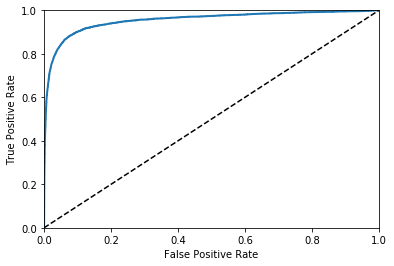

In [62]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [64]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.95468871468495009

predict_probas contains arry with row/instance and col/class with probability that instance belongs to given class

In [67]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')
y_probas_forest

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

Numpy arrays allow bizarre slicing options. The below slices out a column for all rows.

In [69]:
y_scores_forest = y_probas_forest[:,1]

In [70]:
y_scores_forest

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [71]:
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_5, y_scores_forest)

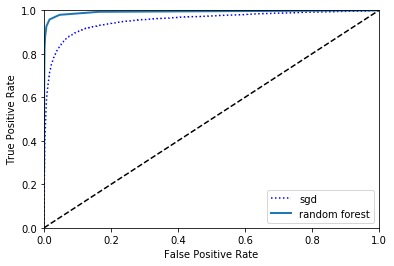

In [73]:
plt.plot(fpr,tpr, "b:", label = 'sgd')
plot_roc_curve(fpr_forest,tpr_forest,'random forest')
plt.legend(loc='lower right')
plt.show()

In [74]:
roc_auc_score(y_train_5, y_scores_forest)

0.99309770184013457

Book suggests measuring precision and recall scores, how do you do that here?

In [77]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [78]:
precision_score(y_train_5, y_train_pred_forest)

0.98349834983498352

In [80]:
recall_score(y_train_5, y_train_pred_forest)

0.82457111234089653

In [83]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [84]:
sgd_clf.predict([some_digit])

array([ 5.])

In [85]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-236749.09118467, -249876.88394266, -277665.17294586,
        -110201.78617363, -313205.94299877,   83932.74210038,
        -812540.82702873, -379238.64961821, -579762.58922785,
        -700888.48331422]])

In [86]:
np.argmax(some_digit_scores)

5

In [87]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [90]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([ 5.])

In [91]:
len(ovo_clf.estimators_)

45

In [92]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [93]:
forest_clf.predict([some_digit])

array([ 5.])

In [94]:
forest_clf.predict_proba([some_digit])

array([[ 0.1,  0. ,  0. ,  0. ,  0. ,  0.7,  0. ,  0.1,  0.1,  0. ]])

In [95]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([ 0.85472905,  0.85324266,  0.85242786])

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([ 0.90836833,  0.91064553,  0.91078662])

In [97]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5729,    3,   21,   10,   11,   48,   50,    9,   39,    3],
       [   2, 6485,   48,   25,    6,   37,   10,   13,  104,   12],
       [  53,   40, 5331,   95,   90,   24,   95,   59,  153,   18],
       [  45,   38,  143, 5372,    1,  217,   33,   55,  133,   94],
       [  18,   29,   46,    9, 5374,   10,   54,   28,   68,  206],
       [  76,   41,   37,  206,   80, 4565,  111,   27,  189,   89],
       [  29,   27,   47,    2,   50,   91, 5620,    5,   47,    0],
       [  21,   20,   76,   30,   47,    9,    4, 5812,   16,  230],
       [  56,  153,   71,  161,   13,  152,   55,   27, 5014,  149],
       [  40,   31,   27,   91,  157,   42,    2,  194,   71, 5294]])

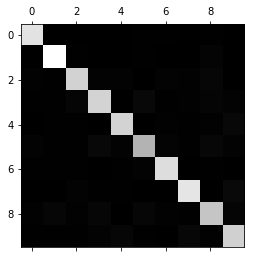

In [98]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [99]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

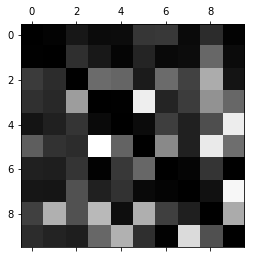

In [101]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [104]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

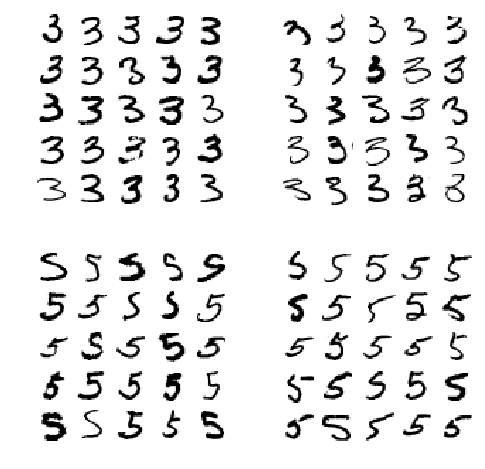

In [105]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [106]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [107]:
knn_clf.predict([some_digit])

array([[False,  True]], dtype=bool)

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average='macro')

In [ ]:
noise = rnd.randint(0,100,(len(X_train), 784))
noise = rnd.randint(0,100,(len(X_test),784))
X_train_mod = X_train + noise
X_test_mod = X_test + noise
y_train_Mod = X_train
y_test_mod = X_test

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)